In [114]:
import os, sys 
sys.path.insert(0,"..")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymatgen.analysis.phase_diagram import PDPlotter, PhaseDiagram, PDEntry, Composition, Element, GrandPotentialPhaseDiagram
from thermopot import materials, calculations, reactions, potentials

In [115]:
Ba_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
S_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S_P2_c/scan/aims.out")
S2_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S8/scan/aims.out", gas=True)
BaS_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")


Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",calculation=S_calc)
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",calculation=S2_calc)
S8 = materials.IdealGas("S8", {'S': 8}, thermo_file="../BaZrS3/nist_janaf/S8.dat",calculation=S8_calc)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2}, "../BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3 = materials.Solid("BaS3",{"Ba": 1,"S":3},"../BaZrS3/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_calc)
BaS3_P2 = materials.Solid("BaS3",{"Ba": 1,"S":3},"../BaZrS3/phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3",{"Ba": 2,"S":3},"../BaZrS3/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

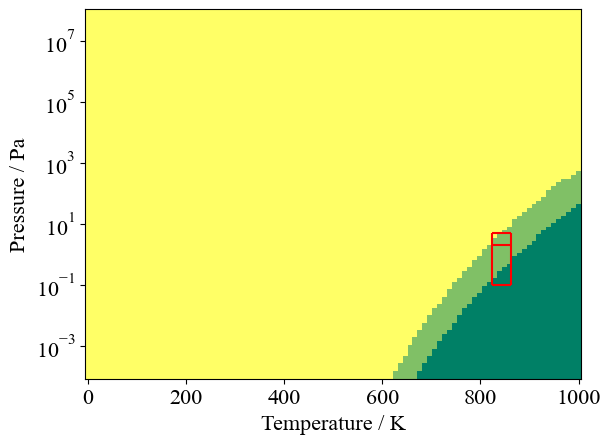

In [161]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-4, 8, 100), ndmin=2).transpose()  

BaS_reaction = reactions.Reaction({Ba:4,S2:6},{BaS:4,S2:4},temperature=T,pressure=P,fu=4)
BaS2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS2:4,S2:2},temperature=T,pressure=P,fu=4)
BaS3_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3:4},temperature=T,pressure=P,fu=4)
BaS3_P2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P2:4},temperature=T,pressure=P,fu=4)
Ba2S3_reaction = reactions.Reaction({Ba:4,S2:6},{Ba2S3:2,S2:3},temperature=T,pressure=P,fu=4)

BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),Ba2S3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

In [162]:
print(BaS_reaction.Dmu(T=863,P=0.1,xc='scan').potential)   
print(BaS2_reaction.Dmu(T=863,P=0.1,xc='scan').potential)
print(BaS3_reaction.Dmu(T=863,P=0.1,xc='scan').potential)
print(BaS3_P2_reaction.Dmu(T=863,P=0.1,xc='scan').potential)
print(Ba2S3_reaction.Dmu(T=863,P=0.1,xc='scan').potential)

-4.633541259478079
-4.563943450571969
-4.390603913459927
-4.276607984385919
-4.4944702538196


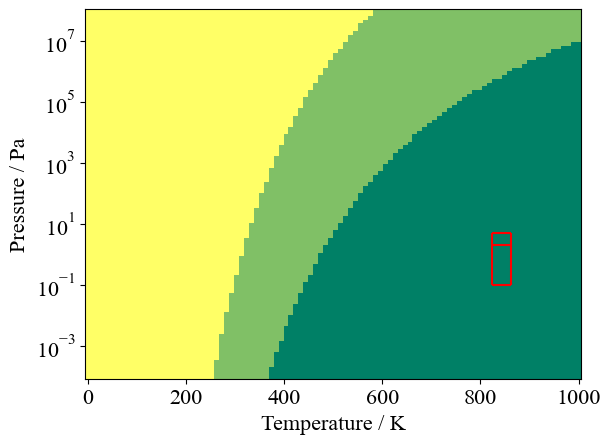

In [163]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-4, 8, 100), ndmin=2).transpose() 
BaS_reaction_2 = reactions.Reaction({Ba:16,S8:6},{BaS:16,S8:4},temperature=T,pressure=P,fu=16)
BaS2_reaction_2 = reactions.Reaction({Ba:16,S8:6},{BaS2:16,S8:2},temperature=T,pressure=P,fu=16)
BaS3_reaction_2 = reactions.Reaction({Ba:16,S8:6},{BaS3:16},temperature=T,pressure=P,fu=16)
BaS3_P2_reaction_2 = reactions.Reaction({Ba:16,S8:6},{BaS3_P2:16},temperature=T,pressure=P,fu=16)
Ba2S3_reaction_2 = reactions.Reaction({Ba:16,S8:6},{Ba2S3:8,S8:3},temperature=T,pressure=P,fu=16)

BaS_system = potentials.Potentials(BaS_reaction_2.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction_2.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction_2.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction_2.Dmu(units="kJ",xc='scan',T=T,P=P),Ba2S3_reaction_2.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

In [164]:
print(BaS_reaction_2.Dmu(T=863,P=0.1,xc='scan').potential)   
print(BaS2_reaction_2.Dmu(T=863,P=0.1,xc='scan').potential)
print(BaS3_reaction_2.Dmu(T=863,P=0.1,xc='scan').potential)
print(BaS3_P2_reaction_2.Dmu(T=863,P=0.1,xc='scan').potential)
print(Ba2S3_reaction_2.Dmu(T=863,P=0.1,xc='scan').potential)

-4.5527911453391425
-4.402443222264992
-4.148353571014013
-4.034357641940005
-4.373345082567539
